# Obesity Status Based on Eating Habits and Physical Condition
by Anam Khan, Farah Mallah, Liis Usin, Reihaneh Sadraei

## Explore the data
Loading the dataset and displaying basic information.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the data set and check the values present

data = pd.read_csv('ObesityDataSet.csv', delimiter=',')
print(str(data.shape[0])+' rows,', len(data.columns), 'columns')
data.sample(5)

2111 rows, 17 columns


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2089,Female,26.000000,1.633887,111.878132,yes,yes,3.0,3.0,Sometimes,no,2.621976,no,0.000000,0.123861,Sometimes,Public_Transportation,Obesity_Type_III
387,Female,37.000000,1.500000,75.000000,yes,yes,2.0,3.0,Frequently,no,1.000000,no,0.000000,0.000000,Sometimes,Motorbike,Obesity_Type_I
2062,Female,25.994949,1.593321,110.168166,yes,yes,3.0,3.0,Sometimes,no,2.447306,no,0.000454,0.486558,Sometimes,Public_Transportation,Obesity_Type_III
22,Female,22.000000,1.650000,60.000000,yes,yes,3.0,3.0,Sometimes,no,2.000000,no,1.000000,0.000000,Sometimes,Automobile,Normal_Weight
2009,Female,26.000000,1.610225,104.936381,yes,yes,3.0,3.0,Sometimes,no,1.322004,no,0.000000,0.539876,Sometimes,Public_Transportation,Obesity_Type_III


In [3]:
# check if any none/null values

data.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [4]:
# basic information about each columns and its dataset
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

Testing the catagorical values with the label

In [6]:
# the column to analyze
column_name = 'CALC' 

# Get the unique non-numerical values and their counts in the specified column
unique_values_count = data[column_name].value_counts()

# Get the total number of unique non-numerical values
total_unique_values = unique_values_count.shape[0]

print(f"Total unique non-numerical values in '{column_name}': {total_unique_values}")
print("Value counts:")
print(unique_values_count)

Total unique non-numerical values in 'CALC': 4
Value counts:
Sometimes     1401
no             639
Frequently      70
Always           1
Name: CALC, dtype: int64


In [7]:
# the column to analyze
column_name = 'MTRANS' 

# Get the unique non-numerical values and their counts in the specified column
unique_values_count = data[column_name].value_counts()

# Get the total number of unique non-numerical values
total_unique_values = unique_values_count.shape[0]

print(f"Total unique non-numerical values in '{column_name}': {total_unique_values}")
print("Value counts:")
print(unique_values_count)

Total unique non-numerical values in 'MTRANS': 5
Value counts:
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: MTRANS, dtype: int64


In [8]:
# the column to analyze
column_name = 'CAEC' 

# Get the unique non-numerical values and their counts in the specified column
unique_values_count = data[column_name].value_counts()

# Get the total number of unique non-numerical values
total_unique_values = unique_values_count.shape[0]

print(f"Total unique non-numerical values in '{column_name}': {total_unique_values}")
print("Value counts:")
print(unique_values_count)

Total unique non-numerical values in 'CAEC': 4
Value counts:
Sometimes     1765
Frequently     242
Always          53
no              51
Name: CAEC, dtype: int64


In [9]:
# Merging the catagories that have less than 20 occurances into a catagory called other
threshold = 20
data['MTRANS'] = data['MTRANS'].apply(lambda x: x if data['MTRANS'].value_counts()[x] >= threshold else 'Other')

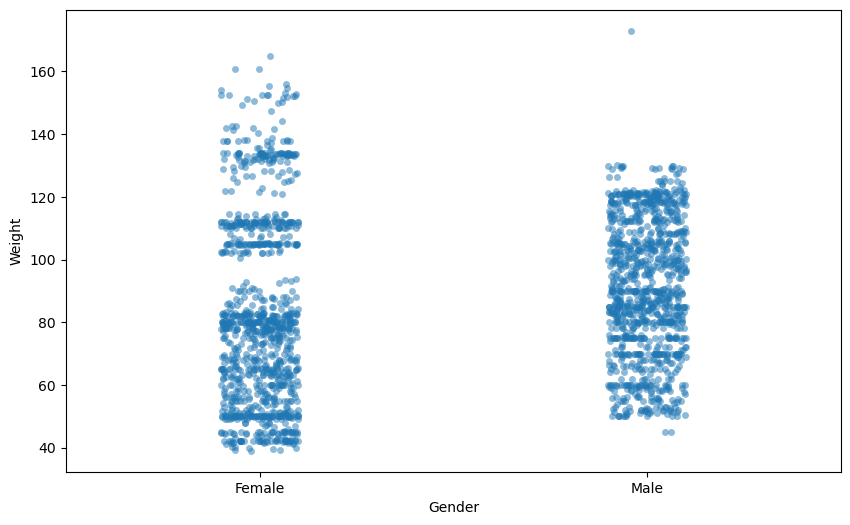

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.stripplot(x=data['Gender'], y=data['Weight'], alpha=0.5, jitter=True, ax=ax)
plt.show()

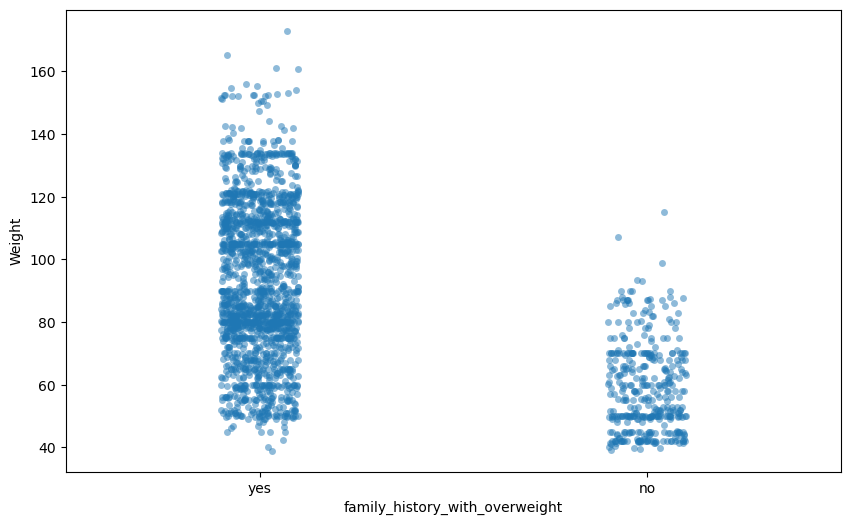

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.stripplot(x=data['family_history_with_overweight'], y=data['Weight'], alpha=0.5, jitter=True, ax=ax)
plt.show()

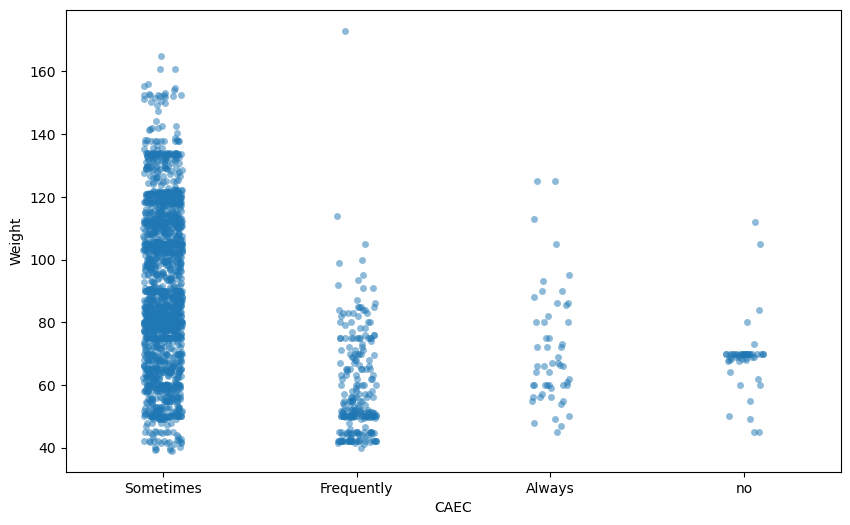

In [12]:
# eating food between meals
fig, ax = plt.subplots(figsize=(10, 6))
sns.stripplot(x=data['CAEC'], y=data['Weight'], alpha=0.5, jitter=True, ax=ax)
plt.show()

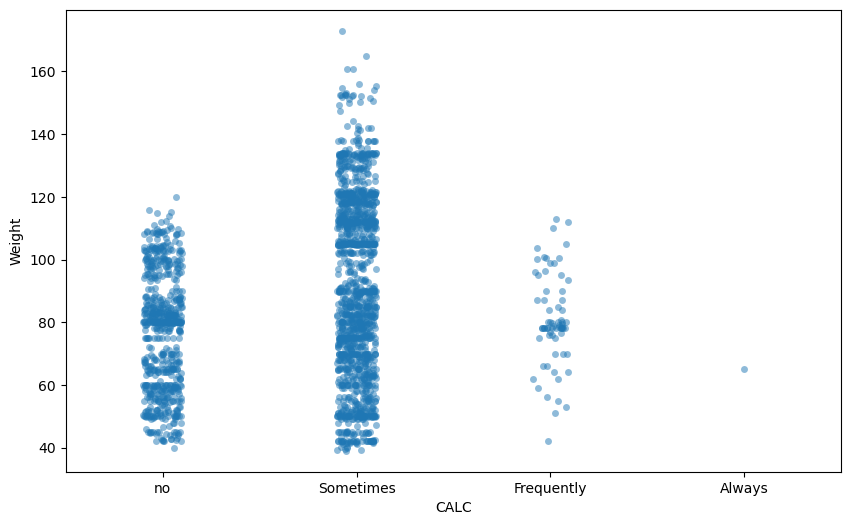

In [13]:
# Consumption of alcohol
fig, ax = plt.subplots(figsize=(10, 6))
sns.stripplot(x=data['CALC'], y=data['Weight'], alpha=0.5, jitter=True, ax=ax)
plt.show()

### Some visualization for numerical features

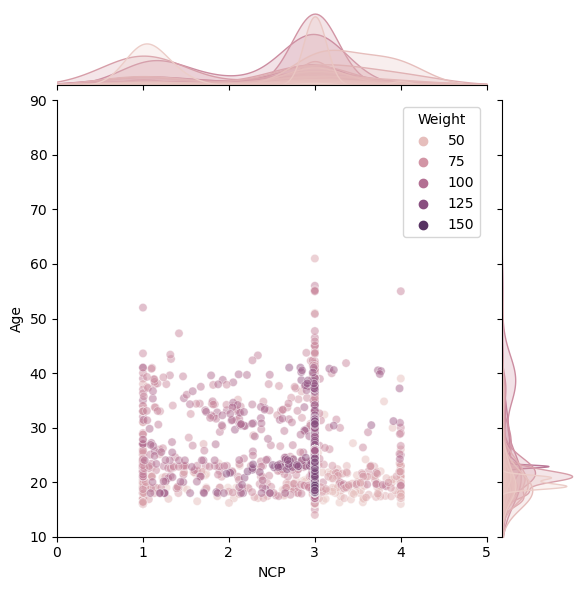

In [14]:
# Number of main meals
sns.jointplot(x=data['NCP'], y=data['Age'], alpha=0.5, hue=data['Weight'], height=6);

# Set the axis limits for zooming in
plt.xlim(0, 5)
plt.ylim(10, 70)

plt.show()

### Below we will separate the obesity types into 2 different categories, as overweight and not overweight

In [15]:
# the column to analyze and to categorize
column_name = 'NObeyesdad'

# Get the unique non-numerical values and their counts in the specified column
unique_values_count = data[column_name].value_counts()

# Get the total number of unique non-numerical values
total_unique_values = unique_values_count.shape[0]

print(f"Total unique non-numerical values in '{column_name}': {total_unique_values}")
print("Value counts:")
print(unique_values_count)

Total unique non-numerical values in 'NObeyesdad': 7
Value counts:
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64


In [16]:
# the column to analyze
column_name = 'CAEC'

# Get the unique non-numerical values and their counts in the specified column
unique_values_count = data[column_name].value_counts()

# Get the total number of unique non-numerical values
total_unique_values = unique_values_count.shape[0]

print(f"Total unique non-numerical values in '{column_name}': {total_unique_values}")
print("Value counts:")
print(unique_values_count)

Total unique non-numerical values in 'CAEC': 4
Value counts:
Sometimes     1765
Frequently     242
Always          53
no              51
Name: CAEC, dtype: int64


In [17]:
# # Classify the set into 2 categories
# def classify_overweight(weight_status):
#     overweight_classes = [
#         'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III',
#         'Overweight_Level_I', 'Overweight_Level_II']
#     if weight_status in overweight_classes:
#         return 'Overweight'
#     else:
#         return 'Not Overweight'

In [18]:
# Create a DataFrame from the data
df = pd.DataFrame(data)

In [19]:
# Apply the function to create a new column
# df['Status'] = df['NObeyesdad'].apply(classify_overweight)

In [20]:
# drop the old column
# df = df.drop('NObeyesdad', axis=1)

In [21]:
# check the data again
df.sample(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
1746,Male,25.758307,1.766547,115.458450,yes,yes,2.203962,3.000000,Sometimes,no,2.156870,no,1.289421,1.220767,Sometimes,Public_Transportation,Obesity_Type_II
968,Female,31.793937,1.650150,73.810728,yes,yes,2.372494,2.849848,Sometimes,no,1.028538,no,0.675983,0.303025,Sometimes,Automobile,Overweight_Level_I
2055,Female,25.962949,1.623812,109.996742,yes,yes,3.000000,3.000000,Sometimes,no,2.395387,no,0.000272,0.461532,Sometimes,Public_Transportation,Obesity_Type_III
804,Male,26.758516,1.801790,86.981202,no,yes,2.652958,2.488189,Sometimes,no,2.000000,no,2.000000,0.096614,no,Automobile,Overweight_Level_I
469,Female,19.000000,1.540000,42.000000,no,yes,3.000000,1.000000,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Insufficient_Weight


In [22]:
# # the column to analyze
# column_name = 'Status'

# # Get the unique non-numerical values and their counts in the specified column
# unique_values_count = data[column_name].value_counts()

# # Get the total number of unique non-numerical values
# total_unique_values = unique_values_count.shape[0]

# print(f"Total unique non-numerical values in '{column_name}': {total_unique_values}")
# print("Value counts:")
# print(unique_values_count)

## Visualize relationships / plot the data

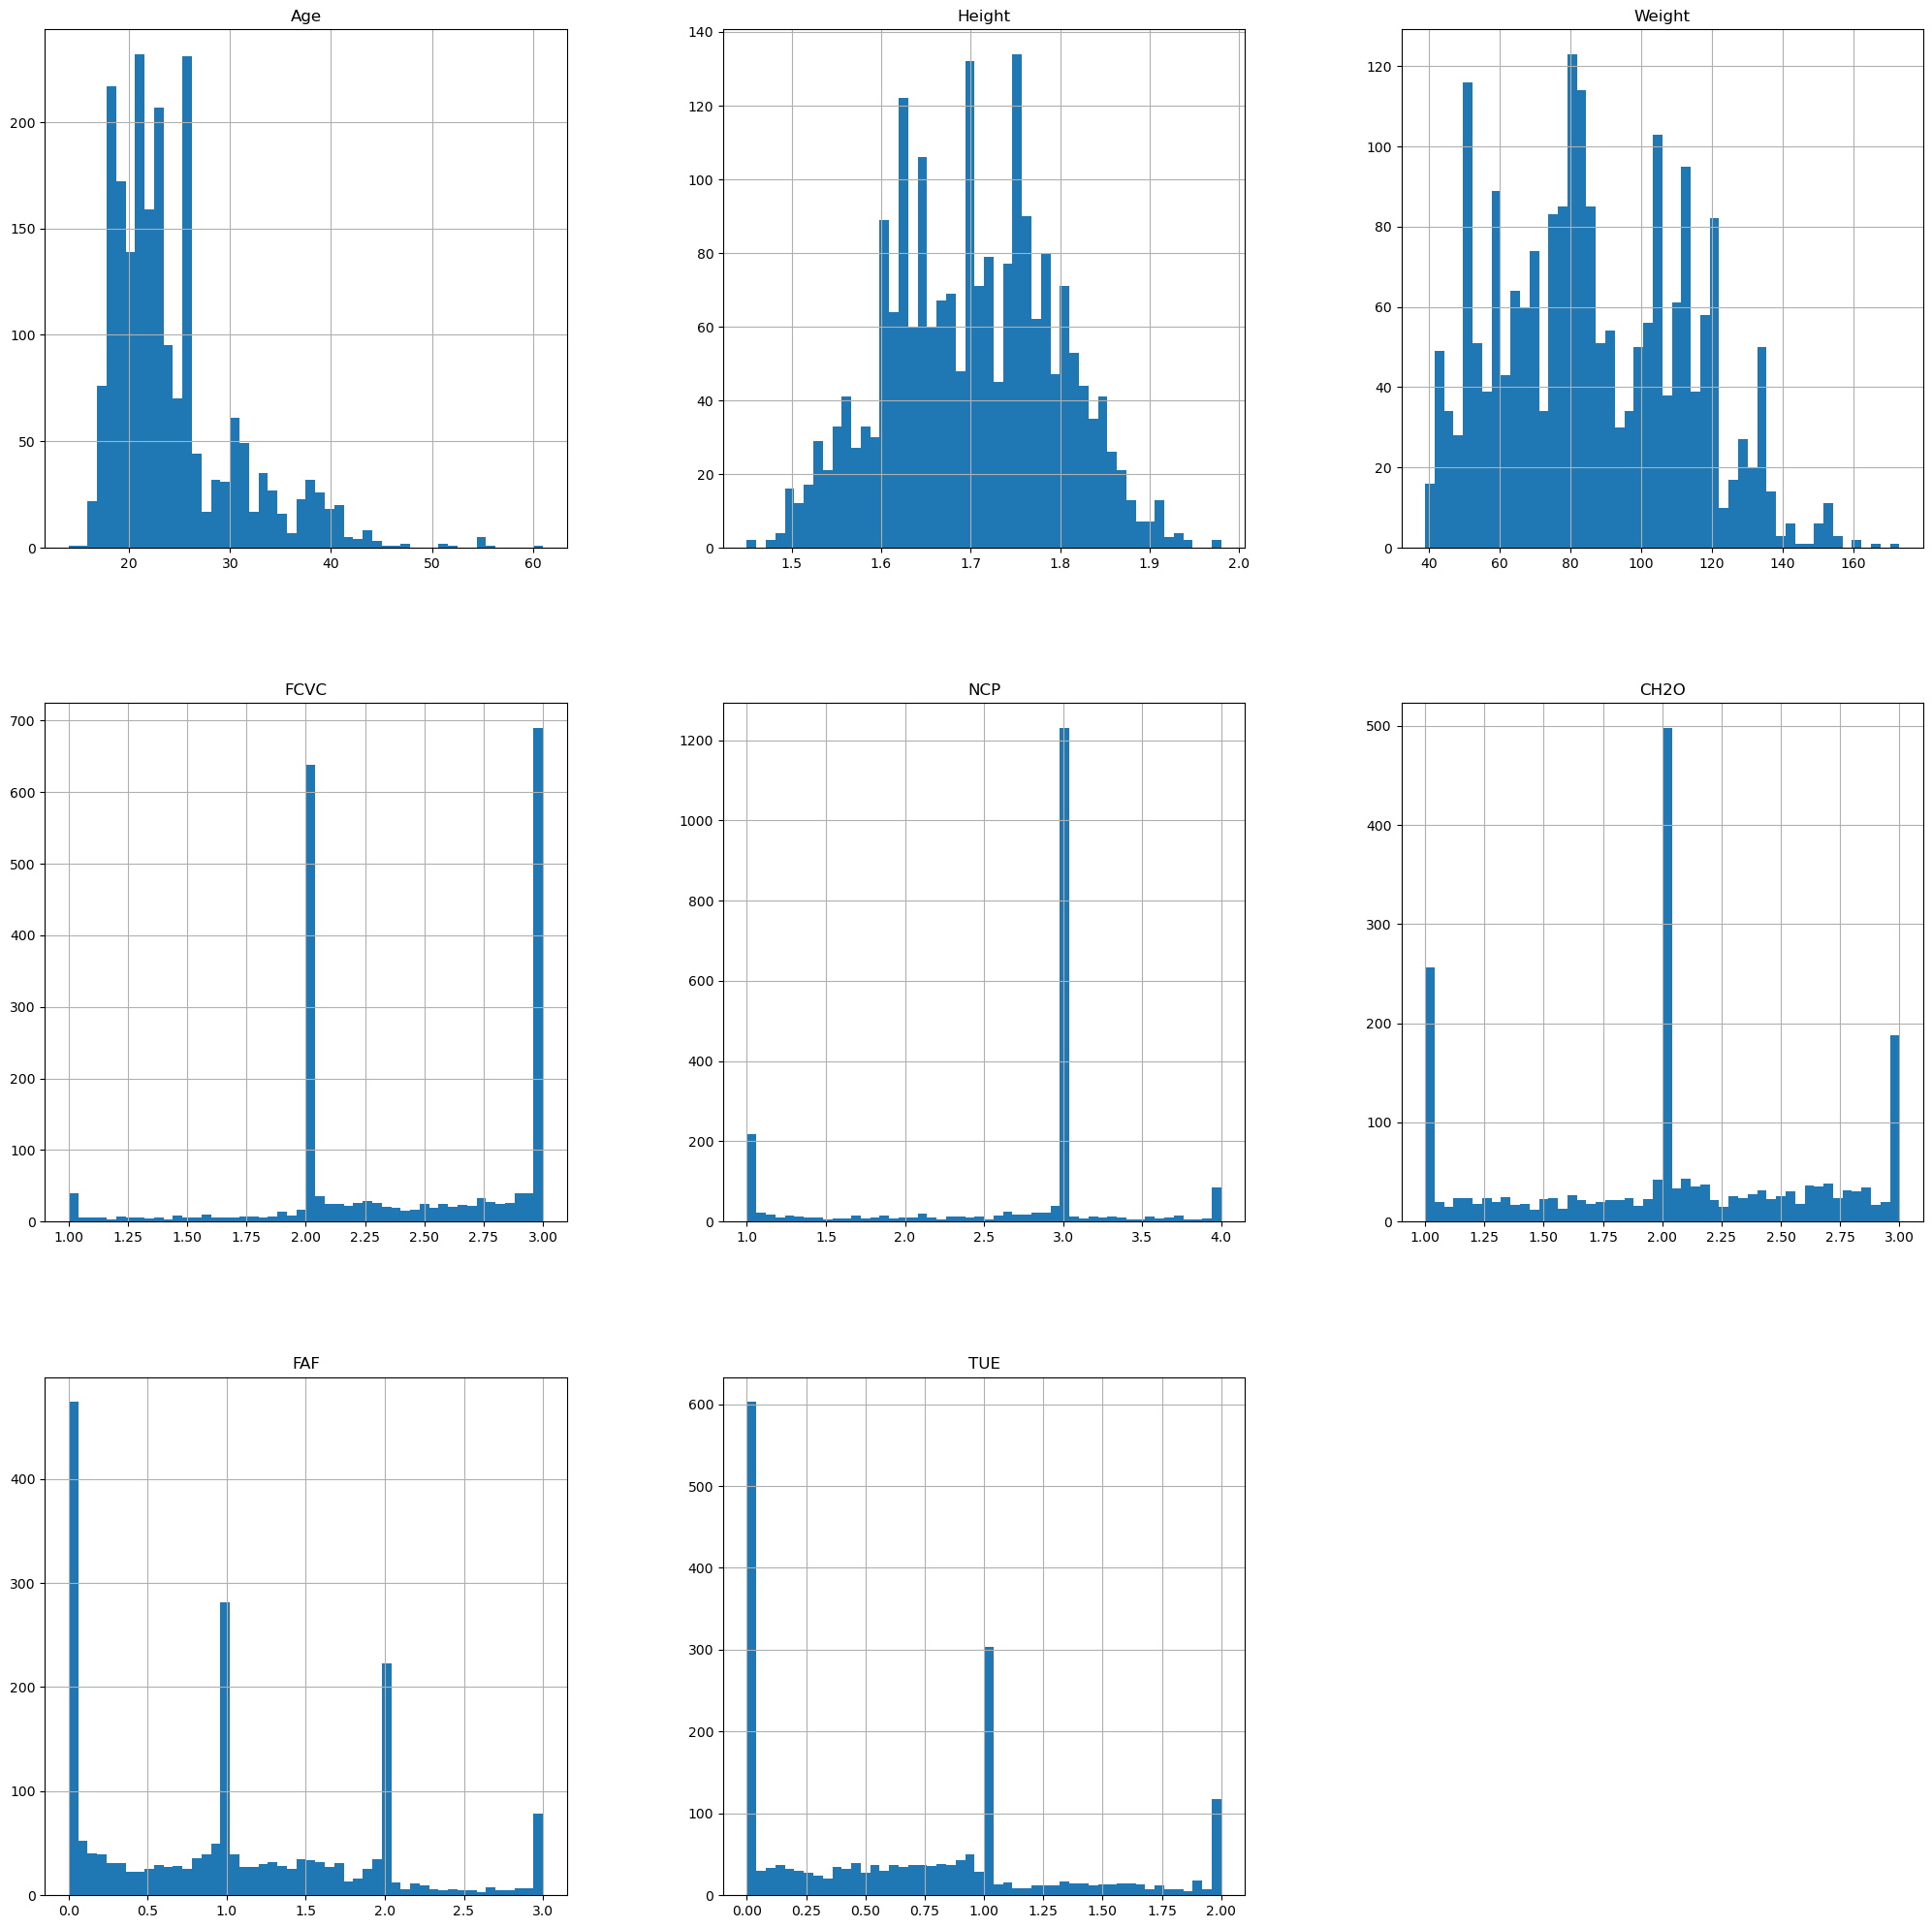

In [23]:
%matplotlib inline
data.hist(bins=50, figsize=(25,25))
plt.show()

In [24]:
df.replace({"NObeyesdad":{        
    "Obesity_Type_III":6, # HIGHEST risk
    "Obesity_Type_II":5,
    "Obesity_Type_I":4,
    "Overweight_Level_II":3,
    "Overweight_Level_I":2,
    "Normal_Weight":1,
    "Insufficient_Weight":0, # lowert risk
}},inplace=True)

The attributes related with the eating habits are:
- Frequent consumption of high caloric food (FAVC),
- Frequency of consumption of vegetables (FCVC),
- Number of main meals (NCP),
- Consumption of food between meals (CAEC),
- Consumption of water daily (CH20),
- and Consumption of alcohol (CALC).

The attributes related with the physical condition are:
- Calories consumption monitoring (SCC),
- Physical activity frequency (FAF),
- Time using technology devices (TUE),
- Transportation used (MTRANS),

<AxesSubplot:>

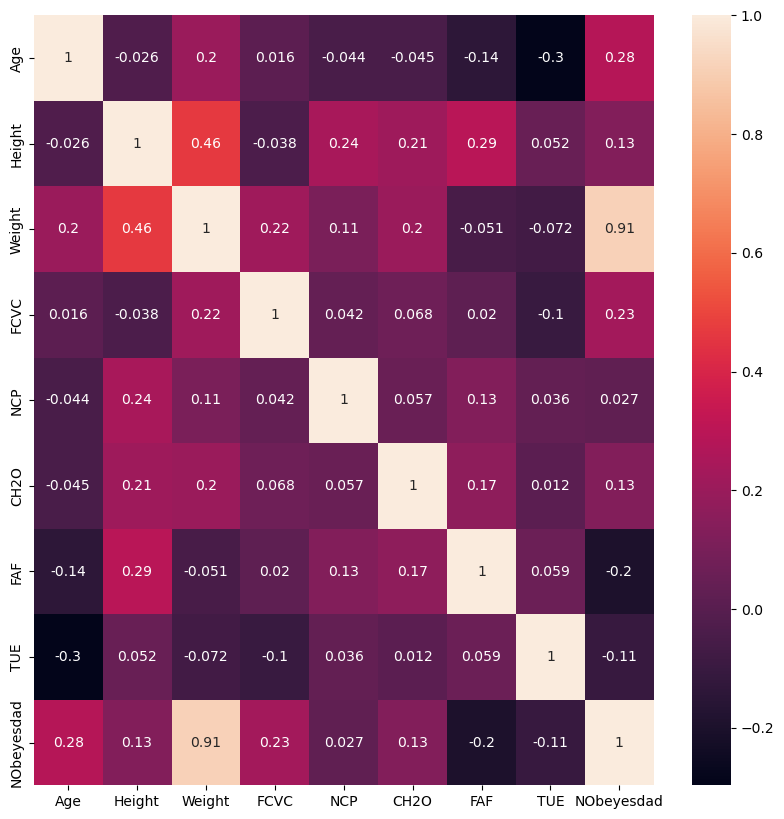

In [25]:
fig, ax = plt.subplots(figsize=(10,10))
corr = data.corr()
sns.heatmap(corr, annot=True)

## Prepare the data
Preparing the data for modeling by handling missing values, encoding categorical features, scaling features, and splitting the data into training and testing sets.

In [26]:
# separating the last column from the rest

# BASED ON WEIGHT
df = df.drop("NObeyesdad", axis=1)

In [27]:
df.sample(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
641,Female,19.220108,1.530266,42.000000,no,yes,3.000000,1.000000,Frequently,no,1.954889,no,0.000000,0.907868,Sometimes,Public_Transportation
1107,Female,37.205173,1.667469,80.993373,yes,yes,2.010540,2.776840,Sometimes,no,1.651548,no,0.000000,0.790967,no,Automobile
542,Female,19.633898,1.660840,49.039794,no,no,2.750715,3.000000,Frequently,no,2.000000,no,1.067817,1.000000,Sometimes,Public_Transportation
2029,Female,20.438478,1.805803,153.149491,yes,yes,3.000000,3.000000,Sometimes,no,2.387991,no,0.850715,0.656491,Sometimes,Public_Transportation
1213,Female,31.386405,1.556579,78.233341,yes,yes,2.136830,2.092179,Sometimes,no,1.505381,no,0.000000,0.000000,Sometimes,Public_Transportation


In [28]:
# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS'])

In [29]:
X_original=df_encoded.drop(columns="Weight")
y=df_encoded["Weight"]

In [30]:
# # Base on label
# X_original=df.drop(columns="NObeyesdad")
# y=df["NObeyesdad"]

In [31]:
# transform numerical data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
def transform_data(X, X_test):
    numeric_columns = X.select_dtypes(exclude='object').columns
    
    numeric_features = Pipeline([
    ('handlingmissingvalues',SimpleImputer(strategy='median')),
    ('preprocessing', PolynomialFeatures(degree=2)),
    ('scaling',StandardScaler(with_mean=True))
    ])
    
    processing = ColumnTransformer([
    ('numeric', numeric_features, numeric_columns)
    ])
    processing.fit(X)
    return processing.transform(X), processing.transform(X_test)

## Create Training and Test set

In [32]:
# splitting to training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_original, y, test_size=0.2, random_state=42)

print('Train X dataset shape:',X_train.shape)
print('Train y dataset shape', y_train.shape)
print('Test X dataset shape:',X_test.shape)
print('Test y dataset shape', y_test.shape)

Train X dataset shape: (1688, 29)
Train y dataset shape (1688,)
Test X dataset shape: (423, 29)
Test y dataset shape (423,)


In [33]:
X_train, X_test = transform_data(X_train, X_test)

## Helper function

In [34]:
# cross validation check of the models
def print_crossval(scores):
    MAE=-np.mean(scores['test_score'],axis=0)
    print(f'MAE = {MAE:.3f} (Mean Absolute Error for cross validation)')

In [35]:
def evaluate_the_model(y_test, y_pred):
    # Evaluating the model

    # Mean Absolute Error (MAE):
    # average absolute difference between the predicted and actual values
    mae = mean_absolute_error(y_test, y_pred)

    # Mean Squared Error (MSE):
    # Performance of a predictive model - the smaller the value the better
    mse = mean_squared_error(y_test, y_pred)

    # Root Mean Squared Error (RMSE):
    # emphasizes larger errors
    rmse = math.sqrt(mse)

    # R-squared (R2):
    # fit of a regression model ~0.8 is good, but not great 
    r2 = r2_score(y_test, y_pred)

    # Mean Absolute Percentage Error (MAPE):
    # percentage difference between the predicted and actual values
    mape = (1/len(y_test)) * sum(abs((y_test - y_pred) / y_test)) * 100
    
    
    print("Mean Absolute Error (MAE) %.2f:" % mae)
    print("Mean Squared Error (MSE) %.2f:" % mse)
    print("Root Mean Squared Error (RMSE) %.2f:" % rmse)
    print("R-squared Score (R^2) %.2f:" % r2)
    print("Mean Absolute Percentage Error (MAPE) %.2f:" % mape)

In [36]:
def display_residualplot(residuals, y_pred):
    plt.scatter(y_pred, residuals)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.axhline(0, color='red', linestyle='--')
    plt.title('Residual Plot')
    plt.show()

# Build ML models

In [37]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import math
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

## Linear Regression

MAE = 10.523 (Mean Absolute Error for cross validation)


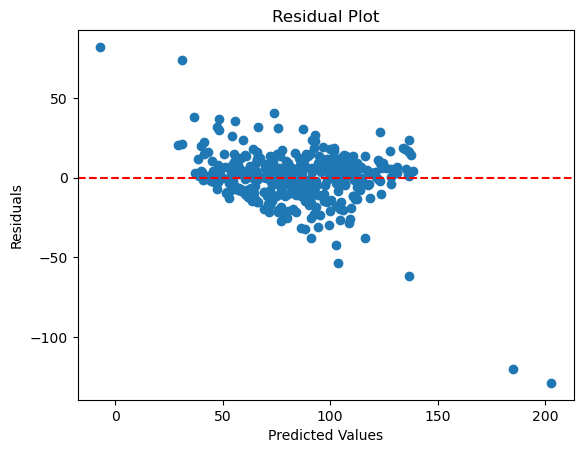

Results gathered after tuning:
Mean Absolute Error (MAE) 10.43:
Mean Squared Error (MSE) 268.35:
Root Mean Squared Error (RMSE) 16.38:
R-squared Score (R^2) 0.62:
Mean Absolute Percentage Error (MAPE) 13.48:


Ridge(alpha=1, random_state=42)

In [44]:
from sklearn.linear_model import Ridge
ridge = Ridge(random_state=42)
print_crossval(cross_validate(ridge, X_train, y_train,scoring='neg_mean_absolute_error', cv=10))

parameters = {'alpha': [1],
             'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg']}

bridge = GridSearchCV(ridge, parameters, scoring='neg_mean_absolute_error', cv=10)
bridge.fit(X_train ,y_train)

y_predridge=bridge.predict(X_test)
residuals = y_test - y_predridge
display_residualplot(residuals, y_predridge)
print("Results gathered after tuning:")
evaluate_the_model(y_test, y_predridge)
bridge.best_estimator_

In [ ]:
# OUTLIERS's need to be removed???!

## K-Nearest Neighbors (KNN) Regression

MAE = 6.477 (Mean Absolute Error for cross validation)


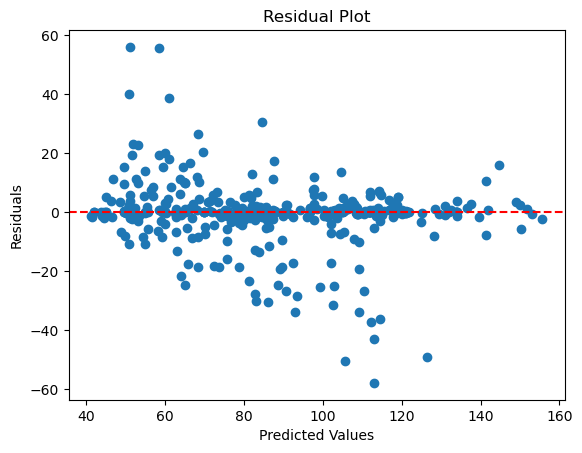

Results gathered after tuning:
Mean Absolute Error (MAE) 5.42:
Mean Squared Error (MSE) 117.61:
Root Mean Squared Error (RMSE) 10.84:
R-squared Score (R^2) 0.83:
Mean Absolute Percentage Error (MAPE) 7.50:


KNeighborsRegressor(n_neighbors=2, p=1, weights='distance')

In [50]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
print_crossval(cross_validate(knn, X_train, y_train, scoring='neg_mean_absolute_error', cv=10))

# possibilities we tried
# weights = ['uniform', 'distance']
# p = [1, 2]

param_grid = {
    'n_neighbors': [2],  # Number of neighbors to consider
    'weights': ['distance'],  # Weighting scheme for neighbors
    'p': [1]  # 1 for Manhattan distance, 2 for Euclidean distance
}
grid_search = GridSearchCV(estimator = knn, param_grid = param_grid, cv = 5, scoring = 'neg_mean_absolute_error')
grid_search.fit(X_train, y_train)
best_knn_model = grid_search.best_estimator_

y_pred = best_knn_model.predict(X_test)
residuals2 = y_test - y_pred
display_residualplot(residuals2, y_pred)
print("Results gathered after tuning:")
evaluate_the_model(y_test, y_pred)
grid_search.best_estimator_

## Random Forest Regression

MAE = 4.942 (Mean Absolute Error for cross validation)


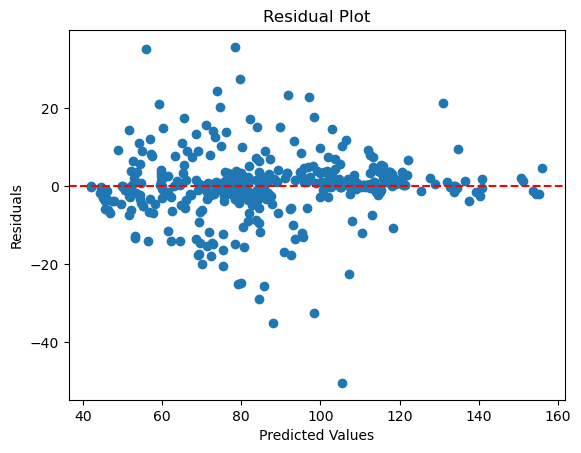

Results gathered after tuning:
Mean Absolute Error (MAE) 4.95:
Mean Squared Error (MSE) 68.62:
Root Mean Squared Error (RMSE) 8.28:
R-squared Score (R^2) 0.90:
Mean Absolute Percentage Error (MAPE) 6.81:


RandomForestRegressor(max_depth=14, max_features=None, n_estimators=400,
                      random_state=42)

In [53]:
#R-squared Score (R^2) 0.90:
# Mean Absolute Percentage Error (MAPE) 6.81:
# 'n_estimators': [400], 'max_depth': [14], 'max_features': [None]

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
print_crossval(cross_validate(rf, X_train,y_train,scoring='neg_mean_absolute_error', cv=10))

# possibilities we tried and ones we couldn't try
# n_estimators = [50, 100, 200]
# max_depth = [4, 8, 12]
# max_features = ['sqrt', 'log2', None]
# min_samples_split = [2, 5, 10]
# min_samples_leaf = [1, 2, 4]
parameters = {
    'n_estimators': [400, 500],
    'max_depth': [14],
    'max_features': [None]
    }

brf = GridSearchCV(rf, parameters, scoring='neg_mean_absolute_error', cv=10)
brf.fit(X_train,y_train)
y_predrf=brf.predict(X_test)
residuals2 = y_test - y_predrf
display_residualplot(residuals2, y_predrf)
print("Results gathered after tuning:")
evaluate_the_model(y_test, y_predrf)
brf.best_estimator_